# Convolutional Autoencoder for Anomaly Detection

### Imports

In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
import torch

### Import utility functions

In [2]:
#from helper_train import train_vae, loss_mse
from helper_plotting import plot_generated_images
from helper_datasets import CustomDataset
from helper_utils import load_data, train_model
from helper_conAutoencoder import CAE, AE , AE1
from helper_train import Trainer
from helper_featureextractor import FeatureExtractor

### Model Hyperparameters

In [3]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.is_available()
#!python -c "import torch; print(torch.cuda.is_available())"
torch.cuda.empty_cache()
print('Device:', device)

# Hyperparameters
RANDOM_SEED = 123
data_class = "gkd_DC0"
size = 1024

# Hyperparameters
hyperParams = {'LEARNING_RATE': 1e-3,
            'NUM_EPOCHS': 50,
            'DATA_CLASS': "gkd_DC0",
            'IMAGE_SIZE': [1024,1024],
              'VERSION': "latent_1024_without_sigmoid_v14"}
params = {'batch_size': 10,
         'shuffle' : True,
         'num_workers' : 10}

Device: cuda


### Prepare the paths for loading the images

In [4]:
DATASET_PATH = r'/home/Project/USL-AD-EVAL/data/DATA_prep_patches'

###  Autoencoder

Let x and z denote the observation and latent variable respectively in the following descriptions.

#### Encoder network
This defines the approximate posterior distribution q(z|x), which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation z. In this example, simply model the distribution as a diagonal Gaussian, and the network outputs the mean and log-variance parameters of a factorized Gaussian. Output log-variance instead of the variance directly for numerical stability.

#### Decoder network
This defines the conditional distribution of the observation p(x|z), which takes a latent sample z as input and outputs the parameters for a conditional distribution of the observation. Model the latent distribution prior p(z) as a unit Gaussian.

### Summary of Model

In [5]:
model = CAE(latent_dim=1024)
model = model.to(device)
summary(model=model,
        input_size=(1,1024,1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 8, 1024, 1024]              16
            Conv2d-2         [-1, 16, 512, 512]           1,168
       BatchNorm2d-3         [-1, 16, 512, 512]              32
         LeakyReLU-4         [-1, 16, 512, 512]               0
            Conv2d-5          [-1, 8, 512, 512]             136
            Conv2d-6         [-1, 32, 256, 256]           2,336
       BatchNorm2d-7         [-1, 32, 256, 256]              64
         LeakyReLU-8         [-1, 32, 256, 256]               0
            Conv2d-9          [-1, 8, 256, 256]             264
           Conv2d-10         [-1, 64, 128, 128]           4,672
      BatchNorm2d-11         [-1, 64, 128, 128]             128
        LeakyReLU-12         [-1, 64, 128, 128]               0
           Conv2d-13          [-1, 8, 128, 128]             520
           Conv2d-14          [-1, 128,

#### Import some helper function

* The Autoencoder is trained on small parts of images using a dataset, the Adam optimizer, and the mean squared error loss function. 
* Now model is trained by averaging the reconstruction errors for each full image instead of keeping the reconstruction errors for each small part. we're computing the loss for the full image by averaging the reconstruction errors for each small part of the image. This will give a single loss value for each full image, which can be used to update the model's parameters via backpropagation.

### Import image using Custom DataLoader 

### Training 

In [6]:
cae_gkd_trainer = Trainer(model, hyperParams=hyperParams, DataLoderParams=params)

loaded 5950 images for training
loaded 910 images for validation
loaded 110 images for testing


[1/50] Train-loss: 457304.818 Val-loss: 398575.656
Time elapsed: 1.36 min
[2/50] Train-loss: 387532.028 Val-loss: 360477.012
[3/50] Train-loss: 350365.698 Val-loss: 340512.373
[4/50] Train-loss: 337253.776 Val-loss: 330604.760


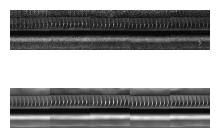

[5/50] Train-loss: 329472.462 Val-loss: 324435.218
Time elapsed: 6.98 min
[6/50] Train-loss: 324371.227 Val-loss: 320241.951
[7/50] Train-loss: 319619.331 Val-loss: 316539.920
[8/50] Train-loss: 315781.586 Val-loss: 311440.399
[9/50] Train-loss: 312552.414 Val-loss: 309232.543
Time elapsed: 12.61 min


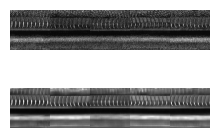

[10/50] Train-loss: 309516.819 Val-loss: 306739.150
[11/50] Train-loss: 306441.299 Val-loss: 304438.188
[12/50] Train-loss: 303888.576 Val-loss: 301323.366
[13/50] Train-loss: 301537.120 Val-loss: 299279.674
Time elapsed: 18.25 min
[14/50] Train-loss: 299500.436 Val-loss: 297584.951


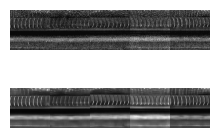

[15/50] Train-loss: 297840.410 Val-loss: 296942.387
[16/50] Train-loss: 296152.513 Val-loss: 295125.412
[17/50] Train-loss: 294559.063 Val-loss: 294163.035
Time elapsed: 23.89 min
[18/50] Train-loss: 293078.901 Val-loss: 292678.988
[19/50] Train-loss: 291734.769 Val-loss: 290981.983


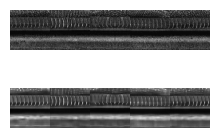

[20/50] Train-loss: 290375.290 Val-loss: 289965.395
[21/50] Train-loss: 289115.830 Val-loss: 288840.302
Time elapsed: 29.53 min
[22/50] Train-loss: 287893.028 Val-loss: 288184.862
[23/50] Train-loss: 286989.993 Val-loss: 287438.260
[24/50] Train-loss: 286009.459 Val-loss: 286236.874


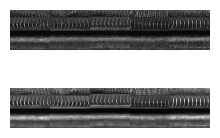

[25/50] Train-loss: 284932.443 Val-loss: 285595.521
Time elapsed: 35.17 min
[26/50] Train-loss: 284315.169 Val-loss: 285358.350
[27/50] Train-loss: 283571.478 Val-loss: 284673.511
[28/50] Train-loss: 282891.691 Val-loss: 283908.795
[29/50] Train-loss: 282068.628 Val-loss: 283695.179
Time elapsed: 40.80 min


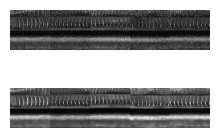

[30/50] Train-loss: 281406.027 Val-loss: 283052.516
[31/50] Train-loss: 280921.434 Val-loss: 282513.477
[32/50] Train-loss: 280279.575 Val-loss: 282534.908
[33/50] Train-loss: 279791.334 Val-loss: 282283.426
Time elapsed: 46.44 min
[34/50] Train-loss: 279420.485 Val-loss: 282172.354


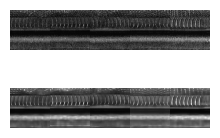

[35/50] Train-loss: 278998.860 Val-loss: 281885.630
[36/50] Train-loss: 278590.711 Val-loss: 282283.034
[37/50] Train-loss: 278059.486 Val-loss: 281554.375
Time elapsed: 52.08 min
[38/50] Train-loss: 277880.475 Val-loss: 281482.500
[39/50] Train-loss: 277395.230 Val-loss: 281628.120


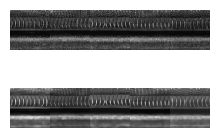

[40/50] Train-loss: 277180.680 Val-loss: 280780.889
[41/50] Train-loss: 276758.275 Val-loss: 281569.407
Time elapsed: 57.73 min
[42/50] Train-loss: 276334.471 Val-loss: 280819.784
[43/50] Train-loss: 276124.010 Val-loss: 280822.657
[44/50] Train-loss: 275819.234 Val-loss: 280552.716


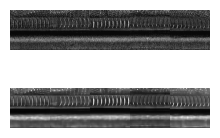

[45/50] Train-loss: 275500.703 Val-loss: 281109.433
Time elapsed: 63.37 min
[46/50] Train-loss: 275224.078 Val-loss: 280407.054
[47/50] Train-loss: 274955.129 Val-loss: 280473.119
[48/50] Train-loss: 274719.713 Val-loss: 280894.864
[49/50] Train-loss: 274514.049 Val-loss: 280729.104
Time elapsed: 69.00 min


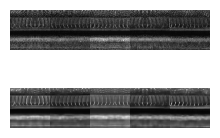

[50/50] Train-loss: 274207.085 Val-loss: 280729.199
Total Training Time: 70.41 min


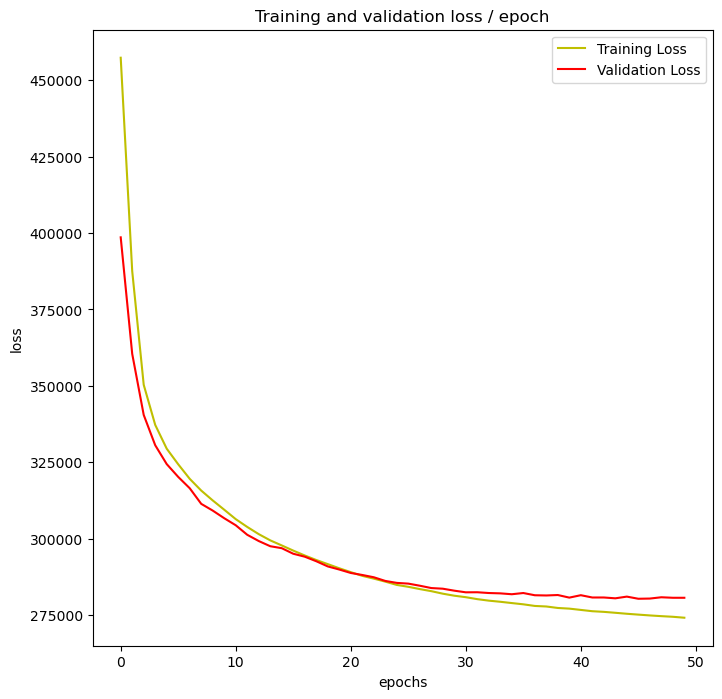

In [7]:
cae_gkd_trainer.train()

### Save model's trained Weight and bias and load it

In [7]:
#cae_gkd_trainer.save_model()
cae_gkd_trainer.load_model(version="latent_1024_without_sigmoid_v14")

### Show the reconstructed images

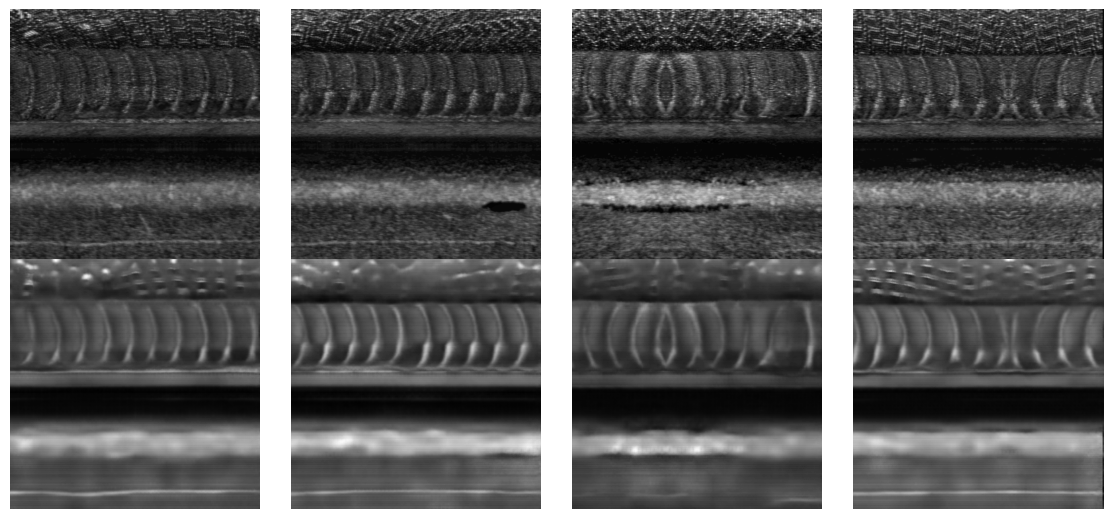

In [8]:
#unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
test_dataLoader = cae_gkd_trainer.test_dataLoader
plot_generated_images(data_loader=test_dataLoader,
                      model=model,
                      #unnormalizer=unnormalizer,
                      device=device,
                      n_images = 4,
                      modeltype='CAE') 

### Calculate the threshold in validation datasets

In [16]:
cae_gkd_trainer.compute_train_outputs()

Mean traing recon. error: 12807151.0


In [17]:
cae_gkd_trainer.compute_test_outputs()

Mean test recon. error anom: 14012055.0
Mean test recon. error good: 12765777.0


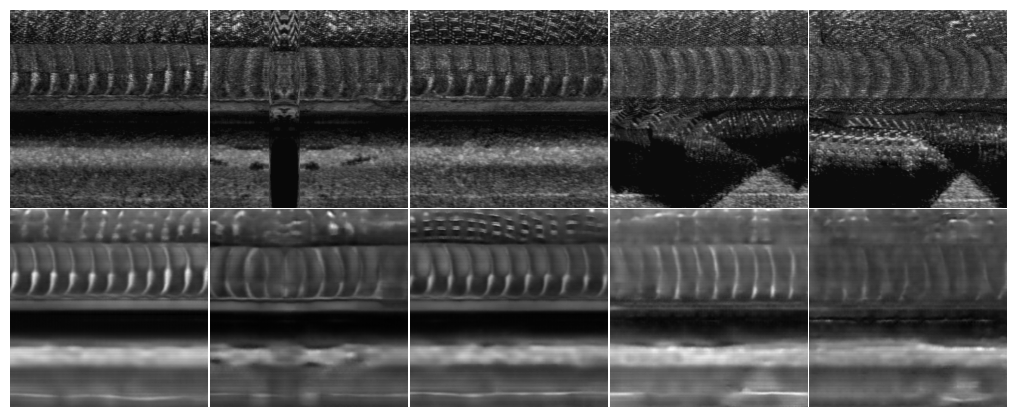

In [18]:
cae_gkd_trainer.inspect(mode= 'test')

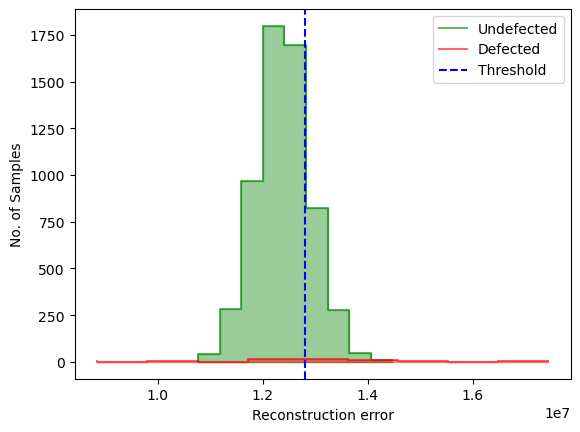

In [19]:
cae_gkd_trainer.show_error_distribution()

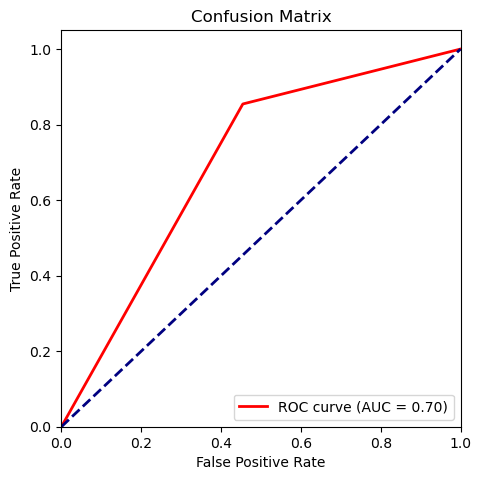

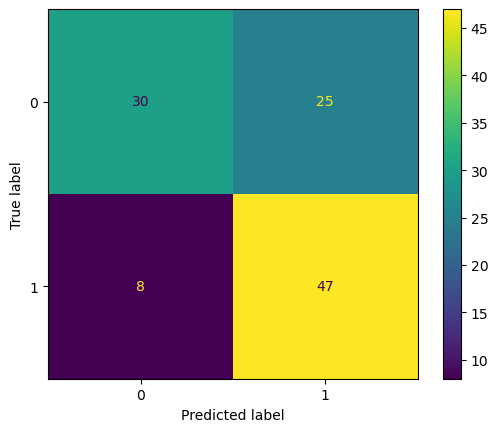

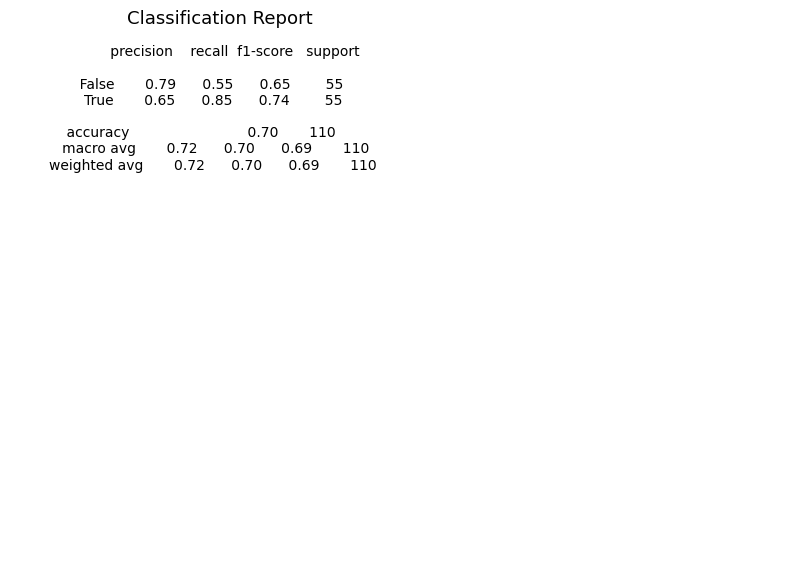

In [20]:
cae_gkd_trainer.evaluate_ae()

In [14]:
cae_gkd_trainer.save_model()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 110 samples in 0.001s...
[t-SNE] Computed neighbors for 110 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 110 / 110
[t-SNE] Mean sigma: 661.999056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.550060
[t-SNE] KL divergence after 1000 iterations: 0.365472


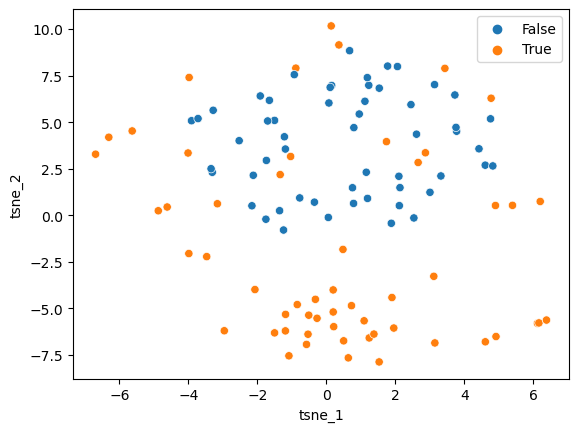

In [15]:
extractor = FeatureExtractor(cae_gkd_trainer.model, cae_gkd_trainer.train_dataLoader, cae_gkd_trainer.test_dataLoader)
extractor.plot_tsne()